In [1]:
import os
import logging
from ultralytics import YOLO
from pathlib import Path
from helpers import save_yolo_labels, convert_xywhn_to_x1y1x2y2, show_labeled_image, load_image, print_tree

In [2]:
logging.basicConfig(level=logging.INFO,filename='detection.log', filemode='w', format='%(asctime)s - %(message)s', datefmt='%d-%b-%y %H:%M:%S')

# Create config for yolo

In [3]:
DATASETS_ROOT_PATH = r"D:\master_thesis_wd\datasets"
DETECTION_AND_CLASSIFICATION_DATASET_PATH = os.path.join(DATASETS_ROOT_PATH, "detection_and_classification_dataset")

In [4]:
import yaml
data ={
        'path': DETECTION_AND_CLASSIFICATION_DATASET_PATH,
        'train': 'train/images',
        'val': 'val/images',
        'names': {
            0: 'Basophile',
            1: 'Eosinophile',
            2: 'Lymphoblast',
            3: 'Lymphocyte',
            4: 'Monocyte',
            5: 'Myeloblast',
            6: "Neutrophile Band",
            7: "Neutrophile Segment",
            8: "Normoblast",
        }
}
data_as_dict = dict(data)
with open(r"./detection_and_classification_config.yaml", 'w') as yaml_file:
    yaml.dump(data_as_dict, yaml_file, default_flow_style=False)

# Train YOLOv8

In [5]:
model = YOLO("yolov8n.yaml")
model_train = model.train(data="detection_and_classification_config.yaml", epochs=50, name="detection_and_classification_train")  # train the model


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

train: Scanning D:\master_thesis_wd\datasets\detection_and_classification_dataset\train\labels.cache... 1056 images, 0 
val: Scanning D:\master_thesis_wd\datasets\detection_and_classification_dataset\val\labels.cache... 264 images, 0 backg


Plotting labels to C:\Users\Jakub Lechowski\Desktop\master-thesis\code\runs\detect\detection_and_classification_train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000769, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50       2.2G       2.96      4.874      4.204         36        640: 100%|██████████| 66/66 [00:11<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        264        266   0.000126     0.0577   0.000112   2.62e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.08G      2.647       3.95      3.491         28        640: 100%|██████████| 66/66 [00:08<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        264        266      0.653       0.17      0.233      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.08G      2.143      3.318      2.888         31        640: 100%|██████████| 66/66 [00:08<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        264        266       0.36       0.13      0.168      0.093



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.08G      1.793      2.943      2.463         30        640: 100%|██████████| 66/66 [00:08<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0


                   all        264        266    0.00624      0.995      0.175      0.104

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.08G      1.658      2.733       2.25         31        640: 100%|██████████| 66/66 [00:08<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0


                   all        264        266      0.359      0.588      0.352      0.193

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.08G      1.563      2.548      2.136         37        640: 100%|██████████| 66/66 [00:08<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0


                   all        264        266      0.265      0.713      0.381      0.274

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.08G      1.502        2.4      2.065         39        640: 100%|██████████| 66/66 [00:08<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        264        266      0.418      0.609      0.307        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.08G      1.421      2.288      1.974         35        640: 100%|██████████| 66/66 [00:08<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0


                   all        264        266      0.401      0.544      0.444      0.318

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.08G       1.38      2.168      1.905         39        640: 100%|██████████| 66/66 [00:08<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        264        266      0.326      0.783       0.41      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.08G      1.358      2.107      1.869         30        640: 100%|██████████| 66/66 [00:08<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0


                   all        264        266      0.738      0.471      0.567      0.422

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.08G      1.351      2.009      1.877         42        640: 100%|██████████| 66/66 [00:08<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0


                   all        264        266      0.499      0.731       0.65      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.08G       1.28      1.922      1.815         37        640: 100%|██████████| 66/66 [00:08<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        264        266      0.347      0.497      0.344      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.08G      1.249      1.845      1.768         23        640: 100%|██████████| 66/66 [00:08<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0


                   all        264        266       0.64      0.583      0.628      0.455

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.08G      1.256      1.776      1.764         27        640: 100%|██████████| 66/66 [00:08<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        264        266      0.618      0.738      0.719      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.08G      1.234      1.728      1.741         36        640: 100%|██████████| 66/66 [00:08<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0


                   all        264        266      0.315      0.642      0.436      0.327

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.08G      1.236      1.672      1.747         35        640: 100%|██████████| 66/66 [00:08<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        264        266      0.687      0.712      0.718       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.08G      1.237       1.66      1.733         42        640: 100%|██████████| 66/66 [00:08<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0


                   all        264        266      0.629       0.77      0.733      0.552

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.08G      1.212      1.595      1.706         30        640: 100%|██████████| 66/66 [00:08<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0


                   all        264        266       0.59      0.664      0.715       0.54

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.08G      1.194      1.563      1.695         39        640: 100%|██████████| 66/66 [00:08<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0


                   all        264        266      0.524      0.751      0.719      0.545

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.08G      1.209      1.574      1.699         27        640: 100%|██████████| 66/66 [00:08<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0


                   all        264        266      0.644       0.83      0.785      0.593

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.08G      1.171      1.483      1.671         33        640: 100%|██████████| 66/66 [00:08<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0


                   all        264        266      0.658      0.736      0.773      0.568

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.08G      1.169      1.458      1.662         29        640: 100%|██████████| 66/66 [00:08<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0


                   all        264        266      0.588      0.814      0.785      0.613

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.08G      1.163      1.436      1.652         31        640: 100%|██████████| 66/66 [00:08<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0


                   all        264        266      0.676      0.822      0.822      0.631

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.08G      1.157      1.378      1.633         26        640: 100%|██████████| 66/66 [00:08<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        264        266       0.55      0.797      0.768      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.08G      1.131      1.403      1.629         38        640: 100%|██████████| 66/66 [00:08<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0


                   all        264        266      0.571      0.757      0.757      0.576

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.08G      1.107      1.346      1.598         32        640: 100%|██████████| 66/66 [00:08<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0


                   all        264        266      0.622      0.786      0.757      0.559

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.08G      1.111      1.321      1.599         33        640: 100%|██████████| 66/66 [00:09<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        264        266      0.826      0.708      0.812      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.08G      1.133      1.303      1.611         34        640: 100%|██████████| 66/66 [00:08<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        264        266      0.698      0.767      0.831      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.08G      1.115      1.274      1.599         29        640: 100%|██████████| 66/66 [00:08<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0


                   all        264        266      0.889      0.752      0.868      0.657

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.08G       1.13      1.265      1.608         30        640: 100%|██████████| 66/66 [00:07<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        264        266      0.829      0.752      0.827      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.08G      1.128       1.26      1.597         29        640: 100%|██████████| 66/66 [00:07<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0


                   all        264        266      0.721       0.83      0.868      0.678

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.08G      1.099      1.232      1.571         32        640: 100%|██████████| 66/66 [00:08<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0


                   all        264        266      0.669      0.815      0.838      0.665

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.08G      1.078      1.243      1.566         33        640: 100%|██████████| 66/66 [00:07<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0


                   all        264        266      0.877      0.737      0.833      0.658

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.08G      1.096      1.207      1.581         34        640: 100%|██████████| 66/66 [00:08<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        264        266      0.677      0.884      0.861      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.08G      1.091      1.191      1.573         33        640: 100%|██████████| 66/66 [00:07<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0


                   all        264        266      0.871      0.804      0.864      0.671

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.08G      1.039       1.13      1.532         27        640: 100%|██████████| 66/66 [00:08<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        264        266      0.887      0.783      0.859      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.08G      1.069      1.135      1.546         38        640: 100%|██████████| 66/66 [00:07<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        264        266      0.719      0.846      0.872      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.08G      1.062       1.14      1.542         33        640: 100%|██████████| 66/66 [00:08<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0


                   all        264        266      0.846      0.752      0.833      0.657

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.08G      1.026      1.089      1.514         32        640: 100%|██████████| 66/66 [00:08<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        264        266      0.843      0.814      0.868      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.08G      1.075      1.119      1.557         24        640: 100%|██████████| 66/66 [00:08<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        264        266       0.88      0.765       0.86      0.692


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.22G     0.8698     0.9795       1.38         16        640: 100%|██████████| 66/66 [00:08<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0


                   all        264        266      0.633       0.83      0.811      0.646

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.08G     0.8393     0.9023      1.351         16        640: 100%|██████████| 66/66 [00:08<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        264        266      0.902      0.791      0.866      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.08G     0.8234     0.8777      1.335         17        640: 100%|██████████| 66/66 [00:07<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        264        266      0.855      0.786      0.875      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.08G     0.8099     0.8343      1.317         17        640: 100%|██████████| 66/66 [00:07<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0


                   all        264        266      0.906      0.772      0.876        0.7

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.08G     0.8173       0.83      1.319         16        640: 100%|██████████| 66/66 [00:07<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        264        266      0.857       0.77      0.842      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.08G     0.8007     0.8242       1.31         17        640: 100%|██████████| 66/66 [00:07<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        264        266      0.701      0.812      0.821      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.08G     0.7972     0.8322      1.316         16        640: 100%|██████████| 66/66 [00:07<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        264        266      0.761      0.775      0.822      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.08G     0.7964     0.7785      1.306         16        640: 100%|██████████| 66/66 [00:08<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        264        266      0.707       0.89      0.897      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.08G     0.7853     0.7543      1.293         16        640: 100%|██████████| 66/66 [00:07<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        264        266      0.734      0.871      0.874      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.08G     0.7803     0.7473      1.291         16        640: 100%|██████████| 66/66 [00:07<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        264        266      0.736      0.889      0.893      0.728



50 epochs completed in 0.145 hours.
Optimizer stripped from C:\Users\Jakub Lechowski\Desktop\master-thesis\code\runs\detect\detection_and_classification_train\weights\last.pt, 6.3MB
Optimizer stripped from C:\Users\Jakub Lechowski\Desktop\master-thesis\code\runs\detect\detection_and_classification_train\weights\best.pt, 6.3MB

Validating C:\Users\Jakub Lechowski\Desktop\master-thesis\code\runs\detect\detection_and_classification_train\weights\best.pt...
Ultralytics YOLOv8.1.1 🚀 Python-3.10.6 torch-2.1.2+cu118 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLOv8n summary (fused): 168 layers, 3007403 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0


                   all        264        266      0.707       0.89      0.897       0.73
             Basophile        264         35      0.976          1      0.995      0.814
           Eosinophile        264         27      0.573      0.963      0.947      0.724
           Lymphoblast        264         45      0.853      0.956      0.971      0.783
            Lymphocyte        264         23      0.907      0.783      0.947      0.832
              Monocyte        264         32      0.593      0.938      0.945      0.744
            Myeloblast        264         41      0.497      0.941      0.853      0.685
      Neutrophile Band        264          7      0.433      0.429      0.508      0.421
   Neutrophile Segment        264         25      0.718          1      0.913      0.742
            Normoblast        264         31      0.816          1      0.989      0.827
Speed: 0.3ms preprocess, 1.9ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to C:\Users\Ja

# Load model metrics

In [6]:
import cv2
import matplotlib.pyplot as plt

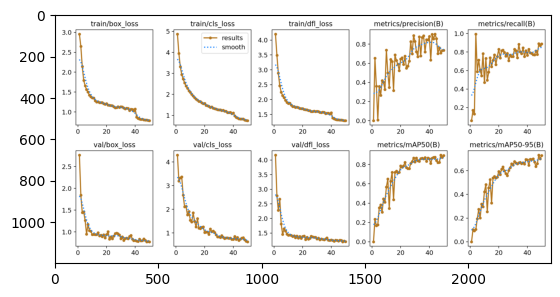

In [7]:
%matplotlib inline

loss = cv2.imread(r"C:\Users\Jakub Lechowski\Desktop\master-thesis\code\runs\detect\detection_and_classification_train\results.png")
plt.imshow(loss)

In [8]:
metrics = model.val()

Ultralytics YOLOv8.1.1 🚀 Python-3.10.6 torch-2.1.2+cu118 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLOv8n summary (fused): 168 layers, 3007403 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning D:\master_thesis_wd\datasets\detection_and_classification_dataset\val\labels.cache... 264 images, 0 backg
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03


                   all        264        266      0.707       0.89      0.897       0.73
             Basophile        264         35      0.976          1      0.995       0.81
           Eosinophile        264         27      0.574      0.963      0.947      0.727
           Lymphoblast        264         45      0.853      0.956      0.972      0.787
            Lymphocyte        264         23      0.906      0.783      0.948      0.829
              Monocyte        264         32      0.593      0.938      0.945      0.744
            Myeloblast        264         41      0.497       0.94      0.855      0.686
      Neutrophile Band        264          7      0.432      0.429      0.508      0.421
   Neutrophile Segment        264         25      0.718          1      0.913      0.743
            Normoblast        264         31      0.816          1      0.989      0.827
Speed: 0.4ms preprocess, 5.6ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to C:\Users\Ja

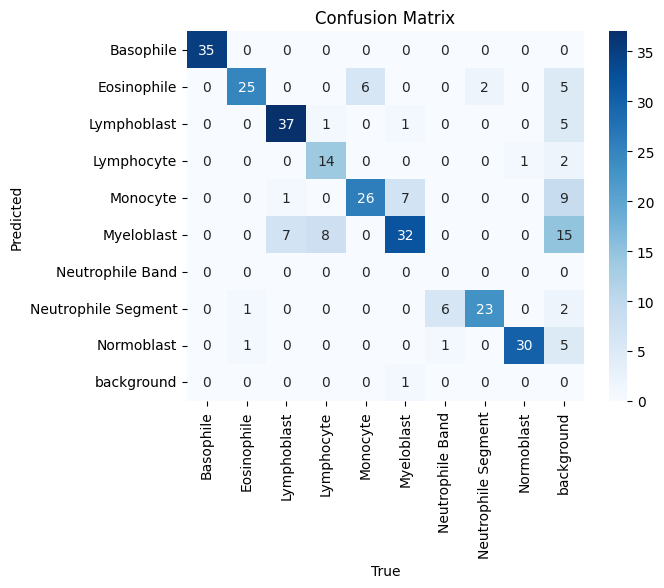

In [12]:
import seaborn as sns
sns.heatmap(metrics.confusion_matrix.matrix,
            annot=True,
            cmap="Blues",
            xticklabels=["Basophile",
                         "Eosinophile",
                         "Lymphoblast",
                         "Lymphocyte",
                         "Monocyte",
                         'Myeloblast',
                         "Neutrophile Band",
                         "Neutrophile Segment",
                         "Normoblast",
                         "background"],
            yticklabels=["Basophile",
                         "Eosinophile",
                         "Lymphoblast",
                         "Lymphocyte",
                         "Monocyte",
                         'Myeloblast',
                         "Neutrophile Band",
                         "Neutrophile Segment",
                         "Normoblast",
                         "background",])
plt.ylabel('Predicted')
plt.xlabel('True')
plt.title('Confusion Matrix')
plt.show()

In [10]:
metrics.results_dict

{'metrics/precision(B)': 0.7073002136823349,
 'metrics/recall(B)': 0.8897207087814755,
 'metrics/mAP50(B)': 0.8969498184335382,
 'metrics/mAP50-95(B)': 0.7303025761657324,
 'fitness': 0.7469673003925129}